# 라이브러리 임포트

In [1]:
from PIL import Image
from skimage.io import imread, imshow, show

from skimage import data, img_as_float
from skimage.color import rgb2gray
from skimage.transform import rescale

from scipy import ndimage, misc, signal, stats, fftpack as fp
import matplotlib.pylab as pylab
import numpy as np

# 시계 영상 읽기

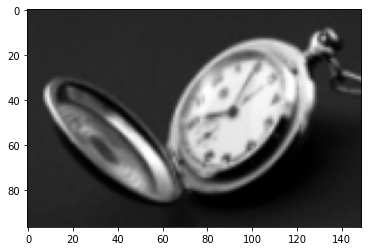

In [12]:
im = Image.open("../images/clock.png")	# 작은 시계 영상

pylab.imshow(im)
pylab.show()

# 업 샘플링

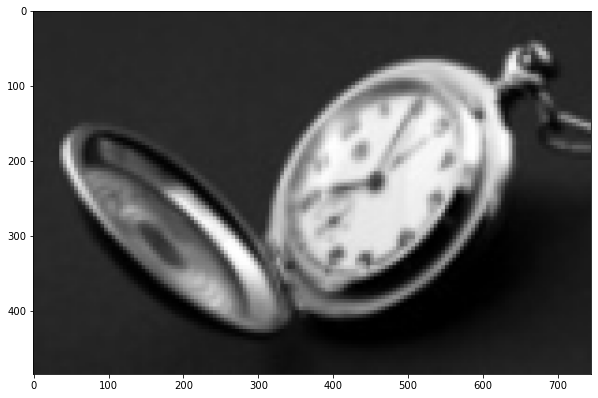

In [13]:
im1 = im.resize((im.width*5, im.height*5), Image.NEAREST)	# 최근접 이웃 보간
pylab.figure(figsize=(10,10)), pylab.imshow(im1)

pylab.show()

# 양선형 보간법

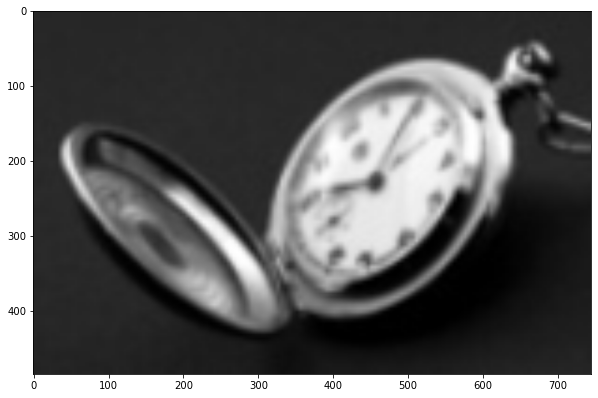

In [14]:
im1 = im.resize((im.width*5, im.height*5), Image.BILINEAR)	# 양선형 보간
pylab.figure(figsize=(10,10)), pylab.imshow(im1)
pylab.show()

# 바이큐빅 보간법

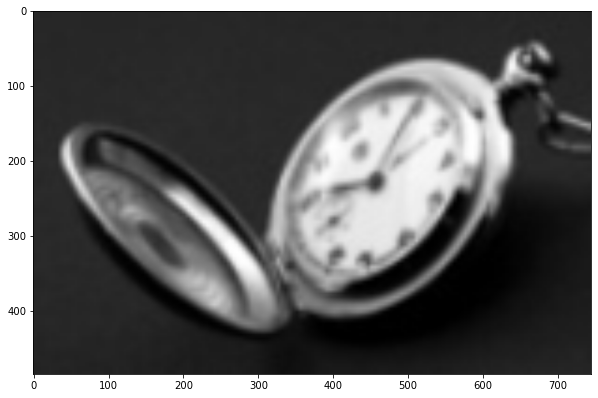

In [16]:
im.resize((im.width*10, im.height*10), Image.BICUBIC).show() # 바이큐빅 보간
pylab.figure(figsize=(10,10)), pylab.imshow(im1)
pylab.show()

# 타지마할 영상 읽기

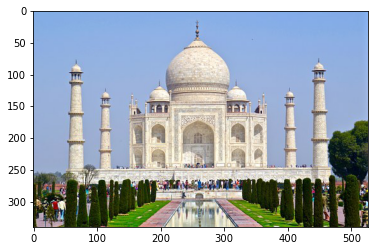

In [17]:
im = Image.open("../images/tajmahal.jpg")	# 작은 시계 영상

pylab.imshow(im)
pylab.show()

# 다운 샘플링

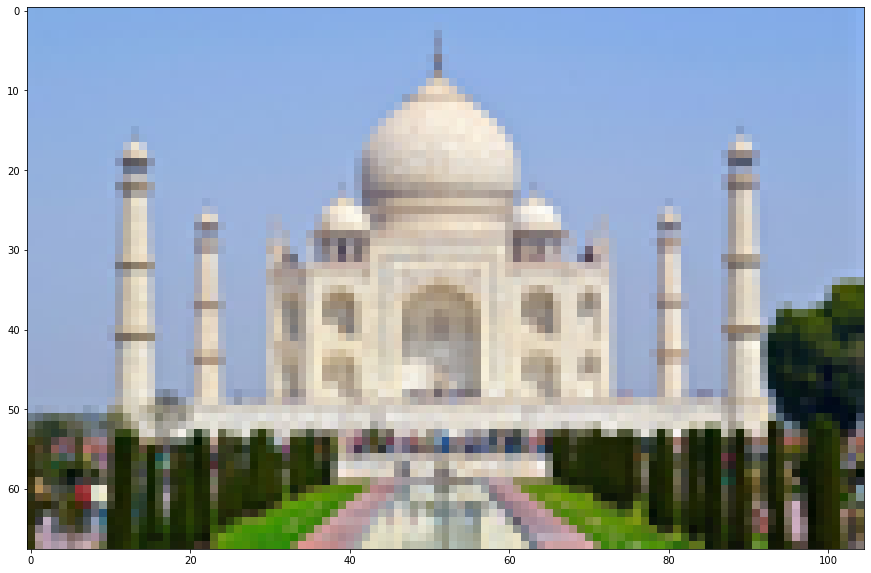

In [23]:
im = Image.open("../images/tajmahal.jpg")
im.show()

im = im.resize((im.width//5, im.height//5))
pylab.figure(figsize=(15,10)), pylab.imshow(im)
pylab.show()

# 앤티-앨리어싱(Anti-aliasing)

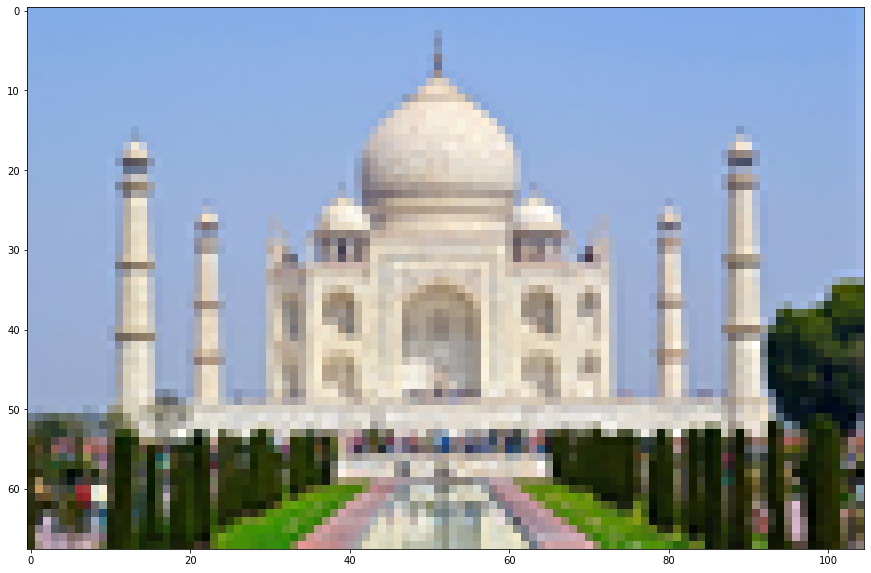

In [22]:
im = Image.open("../images/tajmahal.jpg")

im = im.resize((im.width//5, im.height//5), Image.ANTIALIAS)
pylab.figure(figsize=(15,10)), pylab.imshow(im)
pylab.show()

# scikit-image resize() 함수 사용

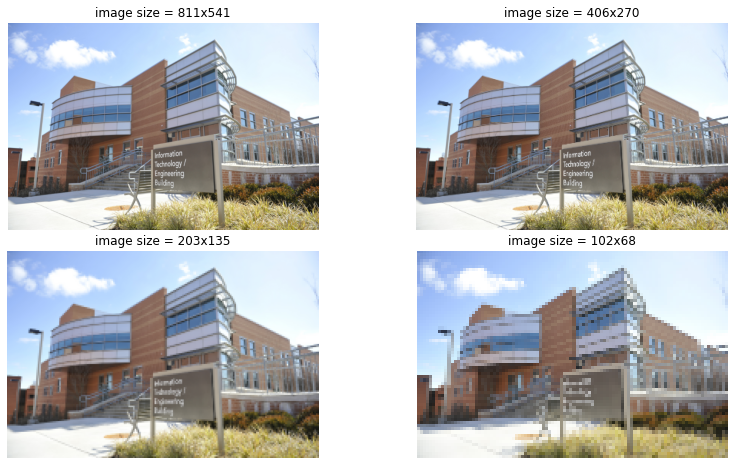

In [24]:
im = imread('../images/umbc.png')
im1 = im.copy()
pylab.figure(figsize=(14,8))
for i in range(4):
    pylab.subplot(2,2,i+1), pylab.imshow(im1, cmap='gray'), pylab.axis('off')
    pylab.title('image size = ' + str(im1.shape[1]) + 'x' + str(im1.shape[0]))
    im1 = rescale(im1, scale = 0.5, multichannel=True, anti_aliasing=False)
    
pylab.subplots_adjust(wspace=0.1, hspace=0.1)
pylab.show()

# 앤티-앨리어싱 코드 변경

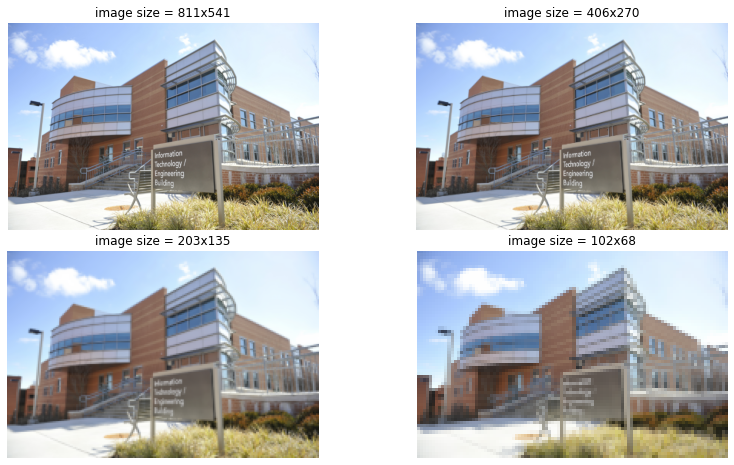

In [25]:
im = imread('../images/umbc.png')
im1 = im.copy()
pylab.figure(figsize=(14,8))
for i in range(4):
    pylab.subplot(2,2,i+1), pylab.imshow(im1, cmap='gray'), pylab.axis('off')
    pylab.title('image size = ' + str(im1.shape[1]) + 'x' + str(im1.shape[0]))
    im1 = rescale(im1, scale = 0.5, multichannel=True, anti_aliasing=True)
    
pylab.subplots_adjust(wspace=0.1, hspace=0.1)
pylab.show()

# 양자화 - PIL 사용

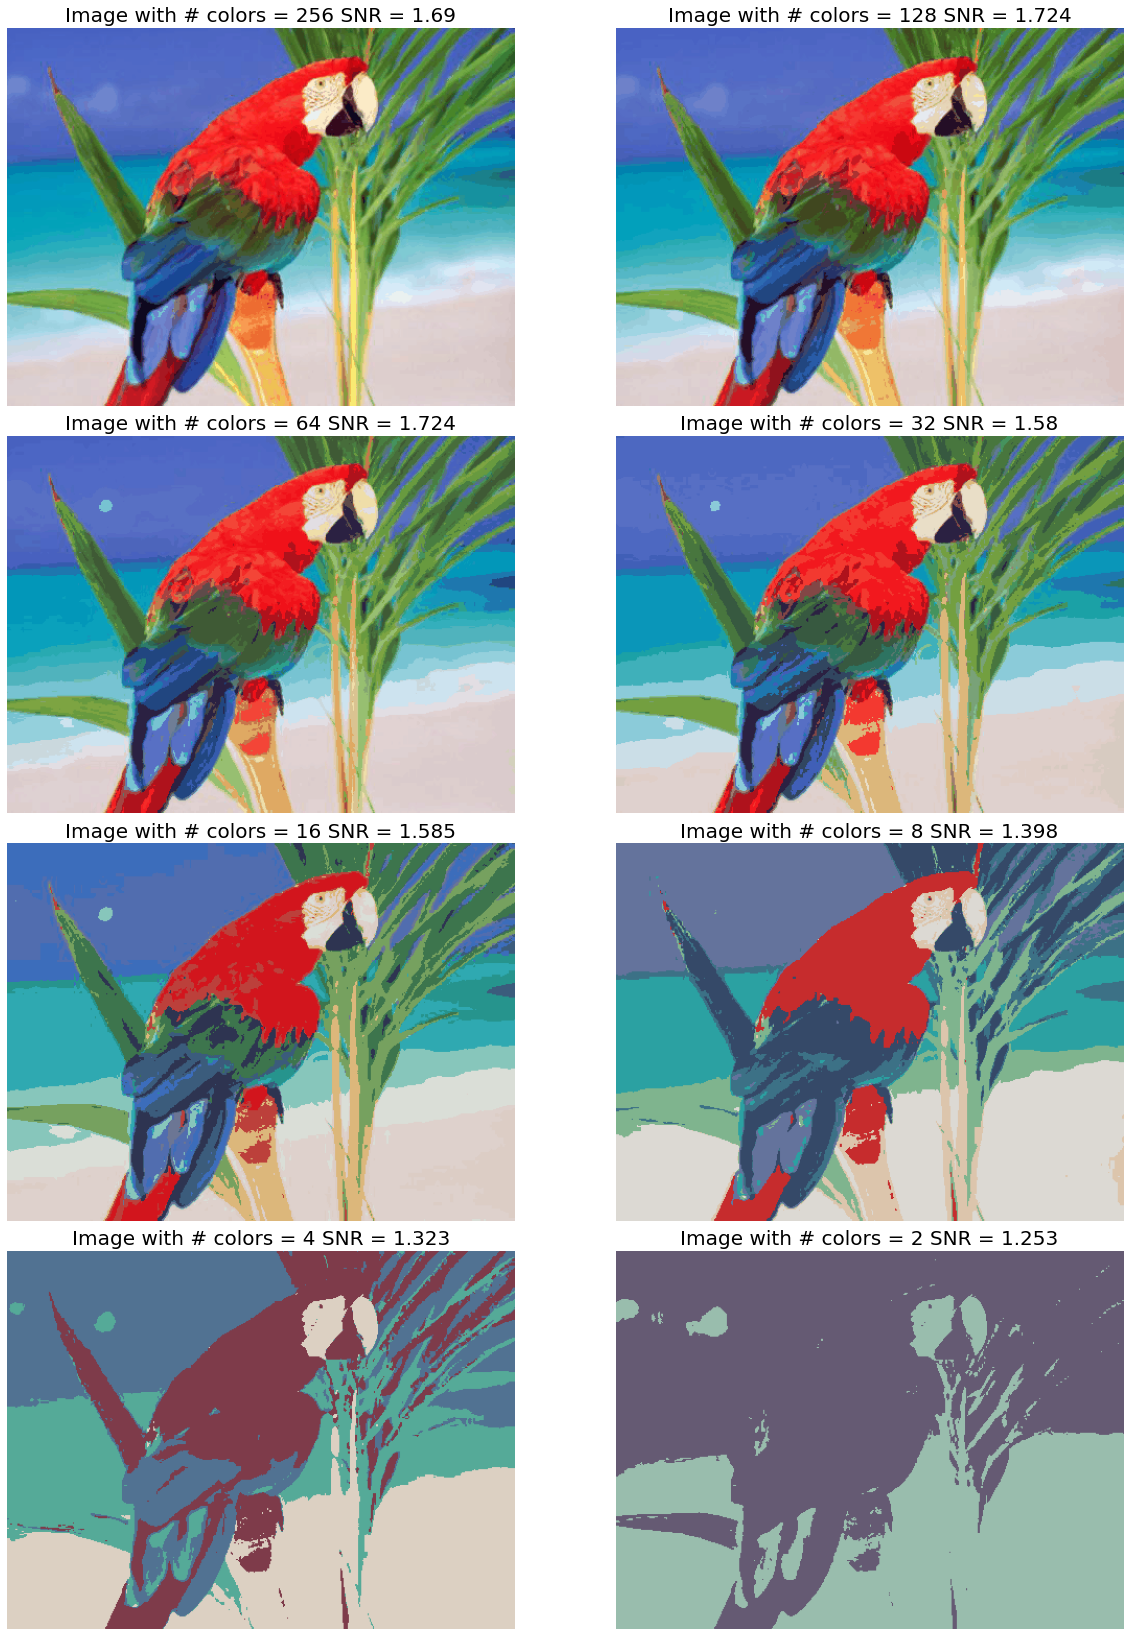

In [26]:
# scipy 1.1 버전부터 signaltonoise() 함수 제공되지 않음
# 아래 함수 구현하여 사용함
def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

im = Image.open('../images/parrot.jpg')
pylab.figure(figsize=(20,30))
num_colors_list = [1 << n for n in range(8,0,-1)]
snr_list = []
i = 1
for num_colors in num_colors_list:
    im1 = im.convert('P', palette=Image.ADAPTIVE, colors=num_colors)
    pylab.subplot(4,2,i), pylab.imshow(im1), pylab.axis('off')
    snr_list.append(signaltonoise(im1, axis=None))
    title = str(num_colors) + ' SNR = ' + str(np.round(snr_list[i-1],3))
    pylab.title('Image with # colors = ' + title , size=20)
    i += 1
    
pylab.subplots_adjust(wspace=0.2, hspace=0)
pylab.show()

# 컬러 양자화의 영향

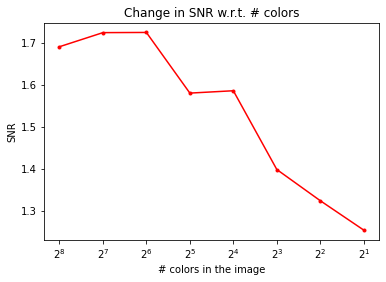

In [27]:
pylab.plot(num_colors_list, snr_list, 'r.-')
pylab.xlabel('# colors in the image')
pylab.ylabel('SNR')
pylab.title('Change in SNR w.r.t. # colors')
pylab.xscale('log', basex=2)
pylab.gca().invert_xaxis()
pylab.show()